In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'E:\Projects\SMS-Email Spam Detector Using ML n DL\Dataset\spam.csv', encoding='latin1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

# 1. Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


Dropping the columns having least values and then changing the value of headers in the dataset

In [6]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)

Converting the target column to binary classification column by Using LabelEncoder



Using 0 -> ham and 1 -> spam

In [7]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

In [8]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
# Finding all the missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [10]:
# Finding all the duplicate values and then removing them from the dataset if any
df.duplicated().sum()
df = df.drop_duplicates(keep='first')

In [11]:
df.shape

(5169, 2)

# Exploratory Data Analysis(EDA)

In [12]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

C:\Users\AMD\AppData\Local\Temp\ipykernel_8640\1240675438.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='target', palette='Set2')


<Axes: xlabel='target', ylabel='count'>

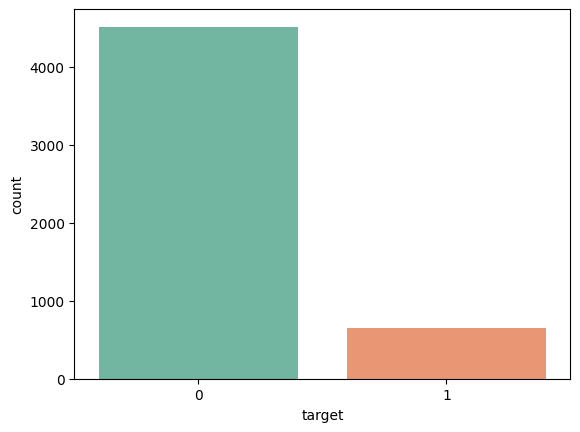

In [13]:
sns.countplot(data=df, x='target', palette='Set2')

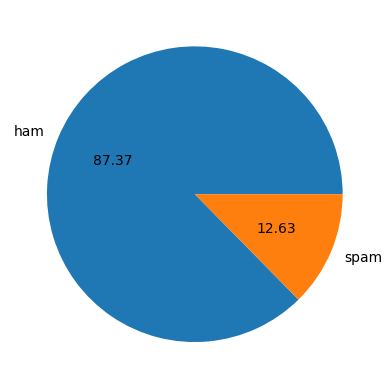

In [14]:
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f')
plt.show()

By addressing the above pie and countplot we recognize that the data is highly imbalanced

Finding the number of characters, words and sentences in the text column and then adding it back to the dataset using Natural Learning ToolKit(nltk) library

In [15]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\AMD\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
# Number of Characters
df['num_of_characters'] = df['text'].apply(len)

In [17]:
# Number of words
df['num_of_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [18]:
# Number of sentences
df['num_of_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [19]:
df.head()

,target,text,num_of_characters,num_of_words,num_of_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [20]:
df[['num_of_characters', 'num_of_words', 'num_of_sentences']].describe()

,num_of_characters,num_of_words,num_of_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [21]:
# Checking for ham and spam messages in the dataset
df[df['target']==0][['num_of_characters', 'num_of_words', 'num_of_sentences']].describe()

,num_of_characters,num_of_words,num_of_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [22]:
df[df['target']==1][['num_of_characters', 'num_of_words', 'num_of_sentences']].describe()

,num_of_characters,num_of_words,num_of_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_of_characters', ylabel='Count'>

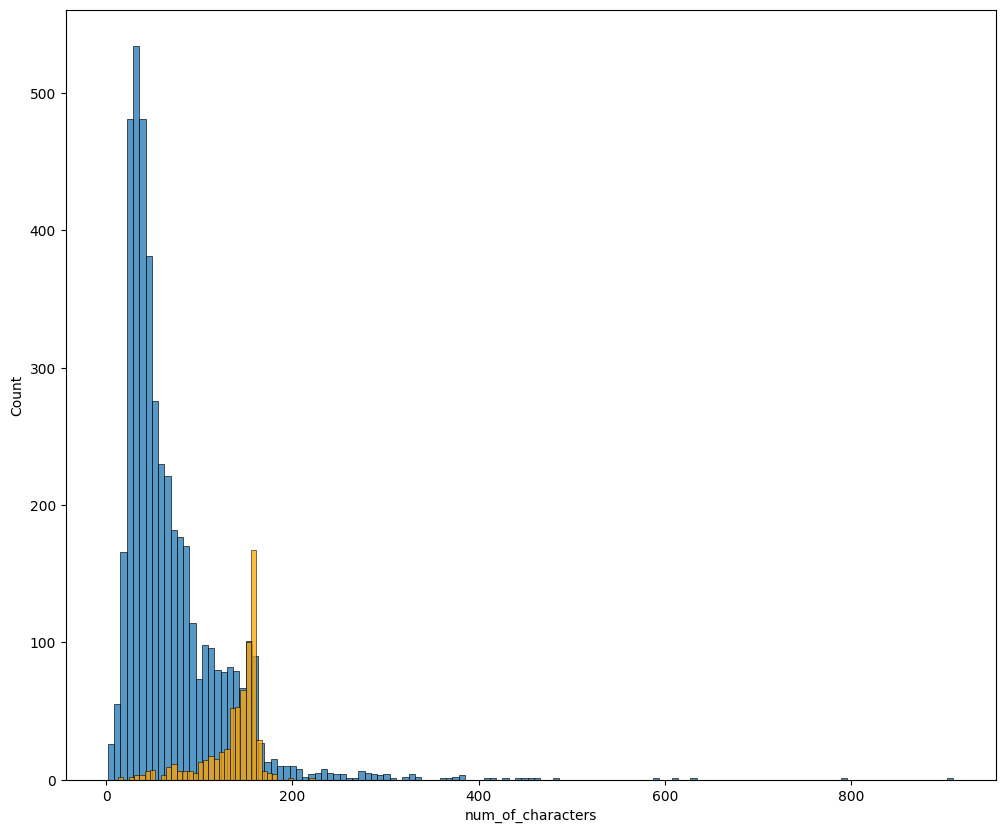

In [23]:
# Number of Characters
plt.figure(figsize=(12,10))
#HistPlot for Ham messages
sns.histplot(df[df['target'] == 0]['num_of_characters'])
#HistPlot for Spam messages
sns.histplot(df[df['target'] == 1]['num_of_characters'], color='orange')


<Axes: xlabel='num_of_words', ylabel='Count'>

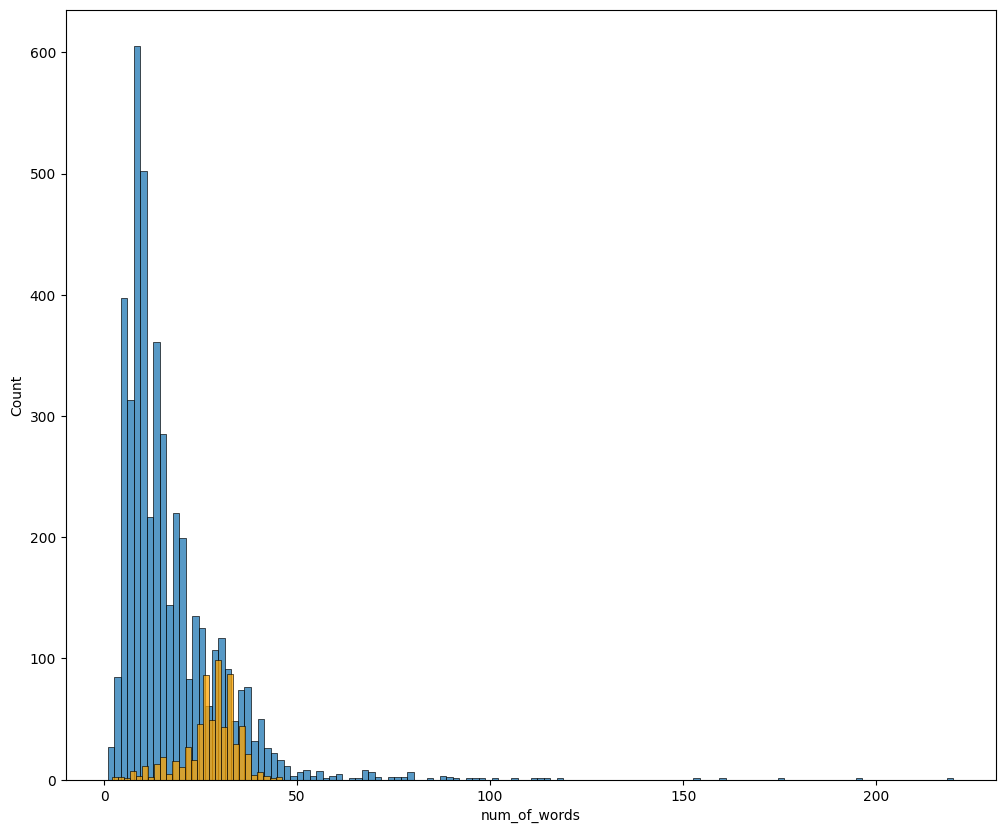

In [24]:
# Number of Words
plt.figure(figsize=(12,10))
#HistPlot for Ham messages
sns.histplot(df[df['target'] == 0]['num_of_words'])
#HistPlot for Spam messages
sns.histplot(df[df['target'] == 1]['num_of_words'], color='orange')

<Axes: xlabel='num_of_sentences', ylabel='Count'>

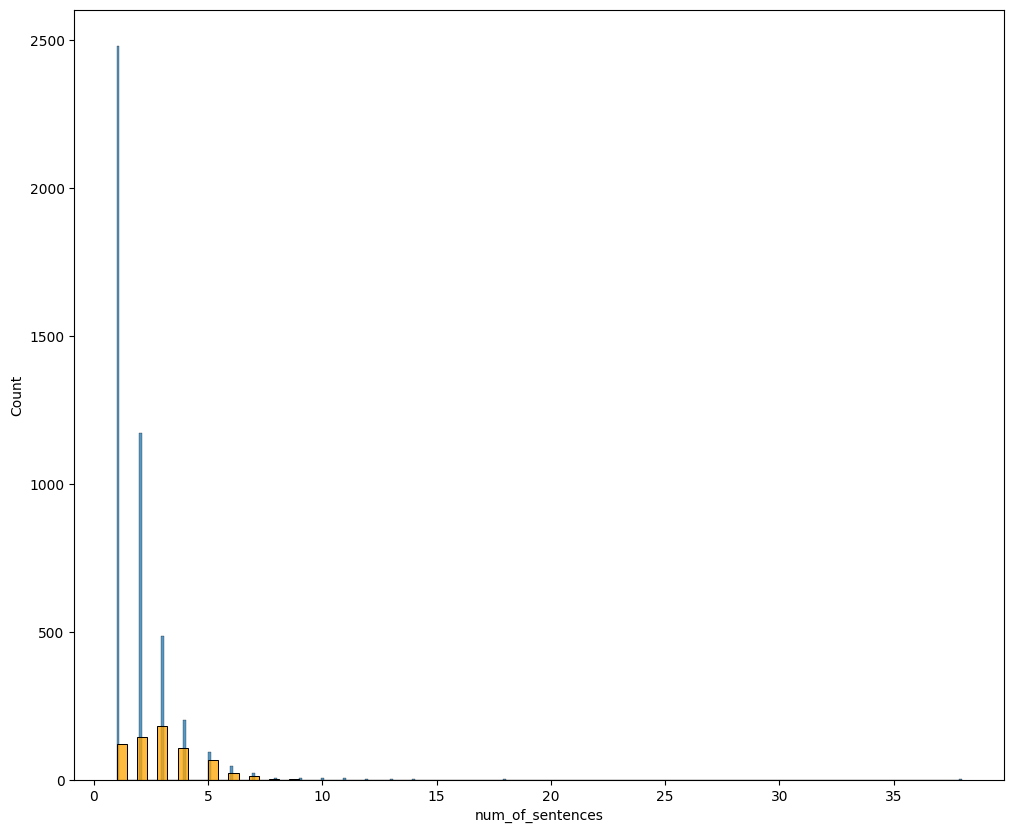

In [25]:
# Number of Sentences
plt.figure(figsize=(12,10))
#HistPlot for Ham messages
sns.histplot(df[df['target'] == 0]['num_of_sentences'])
#HistPlot for Spam messages
sns.histplot(df[df['target'] == 1]['num_of_sentences'], color='orange')

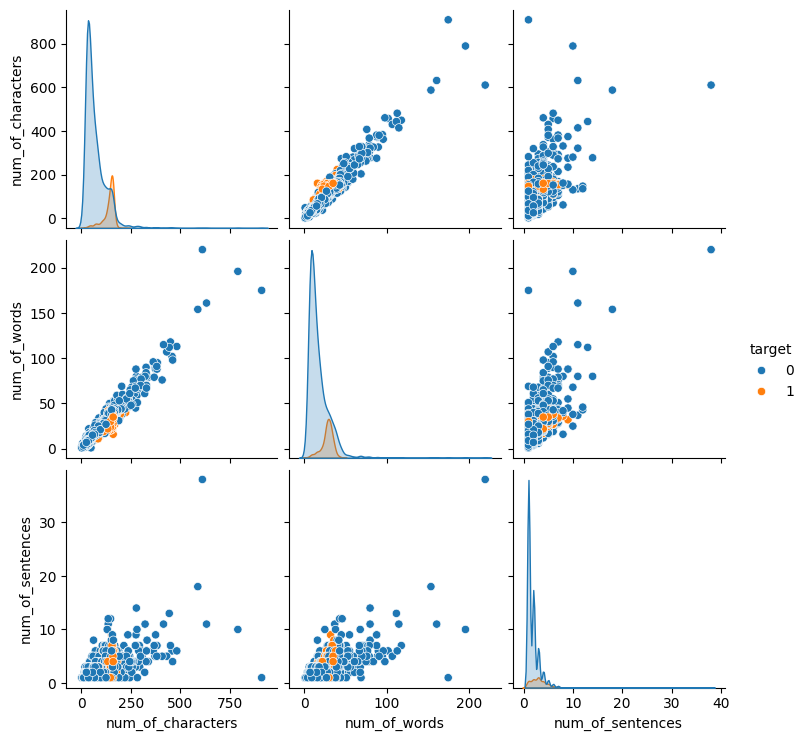

In [26]:
# Finding overall relations between the columns of the dataset
sns.pairplot(data=df, hue='target')

<Axes: >

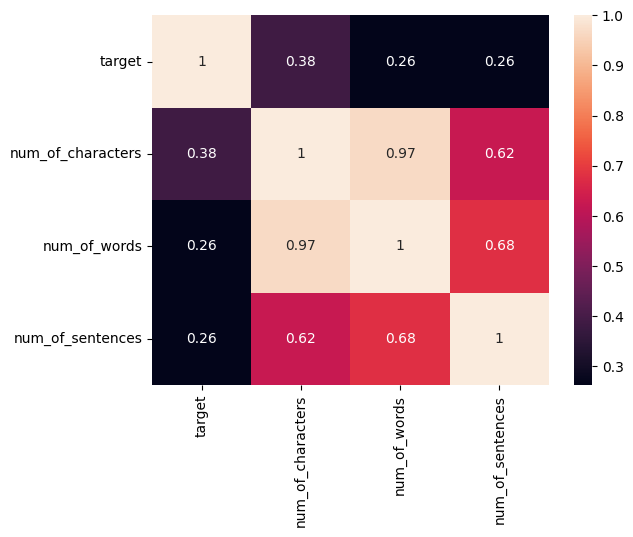

In [27]:
sns.heatmap(df.drop(columns='text').corr(), annot = True)

# Data Preprocessing
Converting data to Lower Case


Tokenization:- Splitting data into sets of words


Removing the Special characters


Removing Stop words and puntuations


Stemming:- Converting all the tenses of the words to it simple tense.

In [28]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Ensure nltk stopwords are downloaded
nltk.download('stopwords')
nltk.download('punkt')  # For tokenization

# Initialize stemmer and stopwords
ps = PorterStemmer()
stop_words = set(stopwords.words('english'))

def transform_text(text):
    # Lower case
    text = text.lower()
    # Tokenization
    tokens = nltk.word_tokenize(text)
    # Removing special characters and alphanumeric filtering
    tokens = [token for token in tokens if token.isalnum()]
    # Removing stop words and punctuation
    tokens = [token for token in tokens if token not in stop_words and token not in string.punctuation]
    # Stemming
    stemmed_tokens = [ps.stem(token) for token in tokens]
    # Joining tokens into a single string
    return " ".join(stemmed_tokens)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\AMD\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\AMD\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [29]:
df['transformed_text'] = df['text'].apply(transform_text)

In [30]:
df.head()

,target,text,num_of_characters,num_of_words,num_of_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


Creating a wordCloud

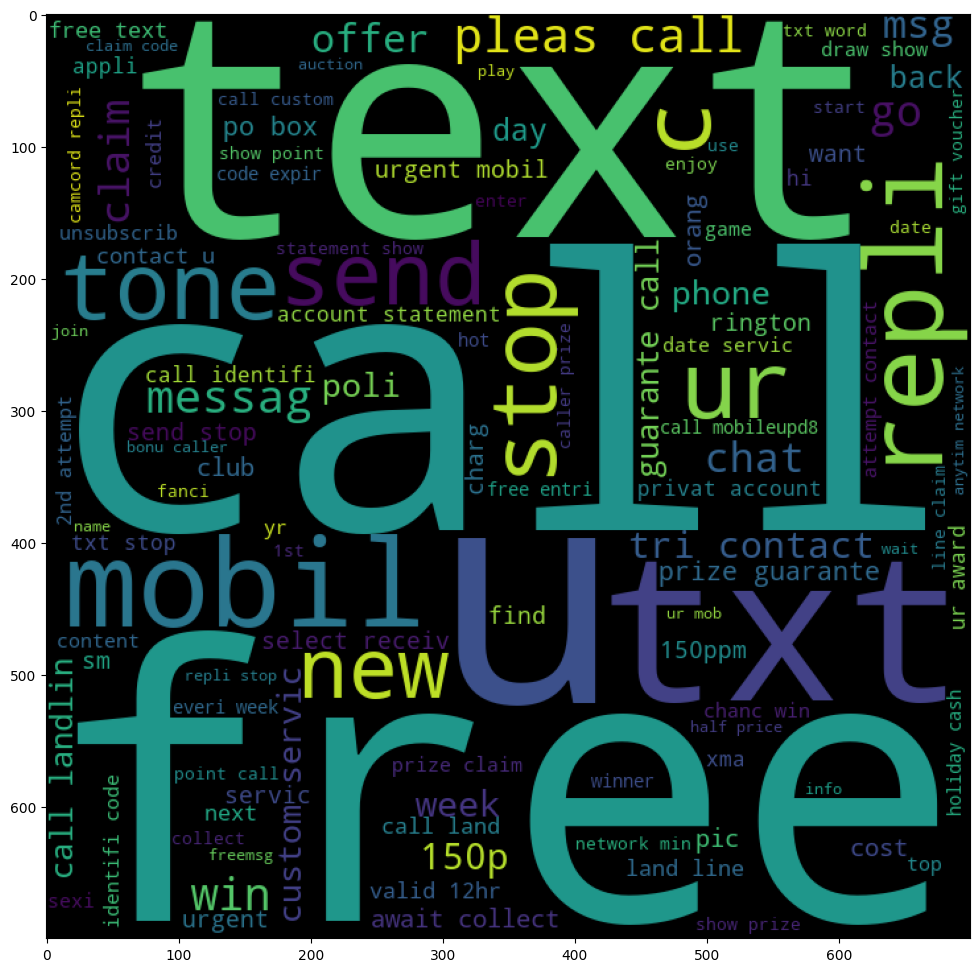

In [31]:
# WorldCloud for Spam messages
plt.figure(figsize=(12,12))
from wordcloud import WordCloud
wc = WordCloud(width=700, height=700, min_font_size=12, background_color='black')
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep = ' '))
plt.imshow(spam_wc)

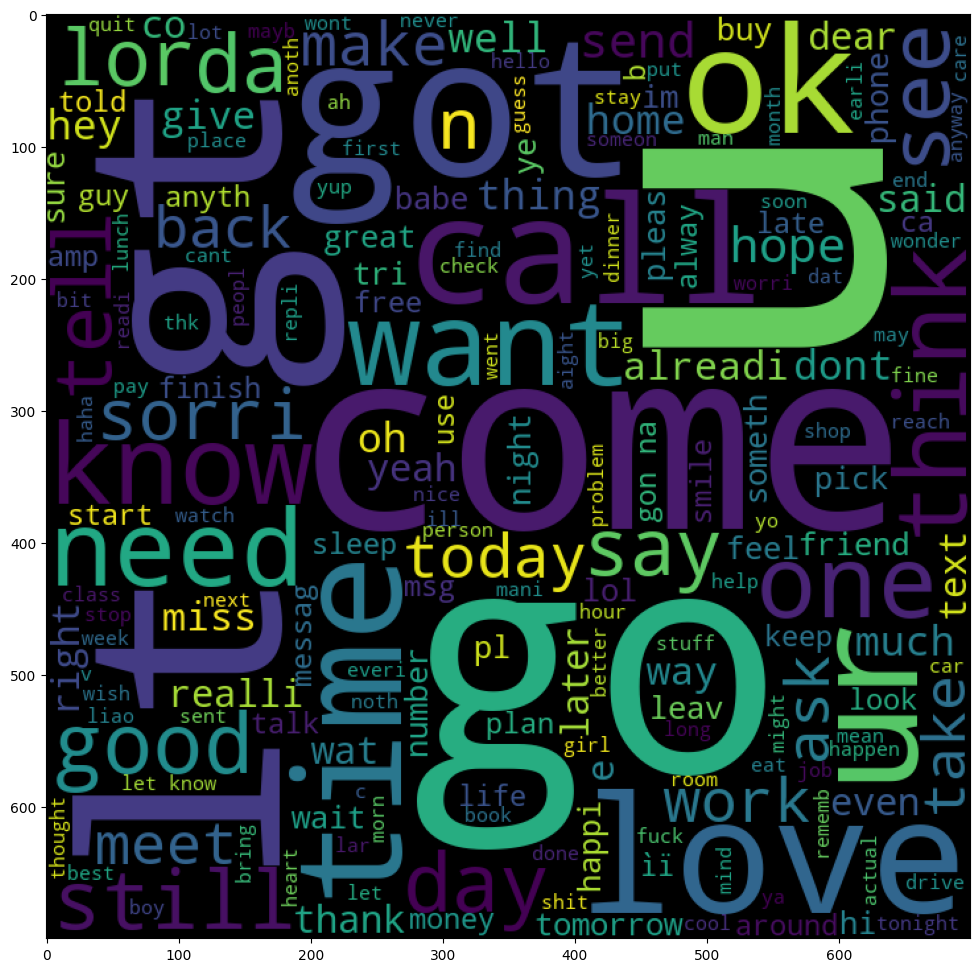

In [32]:
# WorldCloud for Ham messages
plt.figure(figsize=(12,12))
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep = ' '))
plt.imshow(ham_wc)

Finding all the top word count in the spam messages

In [33]:
spam = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam.append(word)

In [34]:
len(spam)

9939

C:\Users\AMD\AppData\Local\Temp\ipykernel_8640\3262164947.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Element', y='Frequency', data=counter_data, palette='Set2')


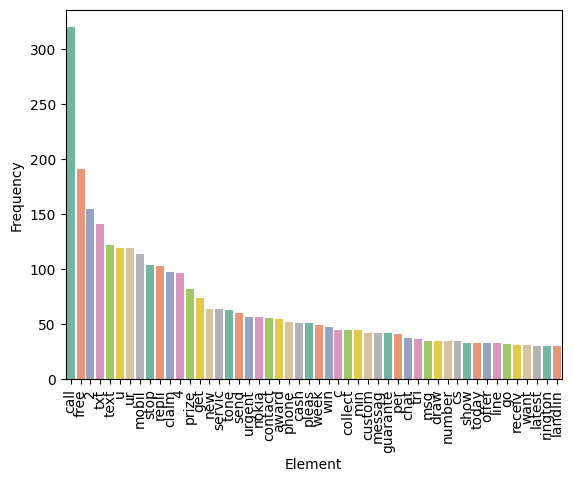

In [35]:
from collections import Counter

# Create a DataFrame from the 50 most common elements in `spam`
counter_data = pd.DataFrame(Counter(spam).most_common(50), columns=['Element', 'Frequency'])

# Create a bar plot
sns.barplot(x='Element', y='Frequency', data=counter_data, palette='Set2')
plt.xticks(rotation='vertical')
plt.show()

C:\Users\AMD\AppData\Local\Temp\ipykernel_8640\1701171791.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Element', y='Frequency', data=counter_data1, palette='Set2')


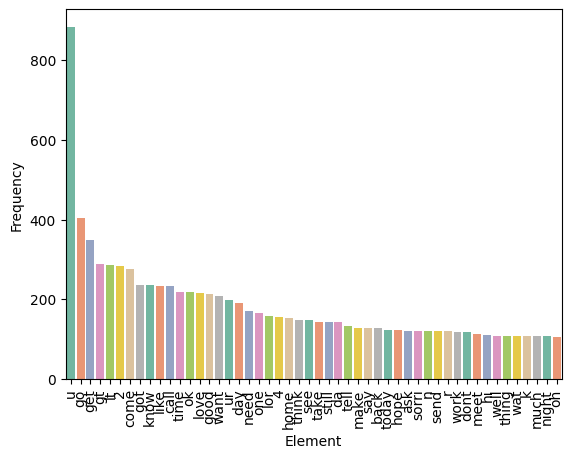

In [36]:
ham = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham.append(word)
        
        
# Create a DataFrame from the 50 most common elements in `spam`
counter_data1 = pd.DataFrame(Counter(ham).most_common(50), columns=['Element', 'Frequency'])

# Create a bar plot
sns.barplot(x='Element', y='Frequency', data=counter_data1, palette='Set2')
plt.xticks(rotation='vertical')
plt.show()

In [37]:
df.head()

,target,text,num_of_characters,num_of_words,num_of_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# Model Building

Since Naive Bayes always provide better model accuracy in case of textual data so checking it first

In [38]:
# Vectorizing the text for the model
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()


In [39]:
x = tfidf.fit_transform(df['transformed_text']).toarray()

In [40]:
y = df['target'].values

In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [42]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score

In [43]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8636363636363636
[[772 117]
 [ 24 121]]
0.5084033613445378


In [44]:
bnb = BernoulliNB()
bnb.fit(x_train, y_train)
y_pred2 = bnb.predict(x_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9661508704061895
[[885   4]
 [ 31 114]]
0.9661016949152542


In [45]:
mnb = MultinomialNB()
mnb.fit(x_train, y_train)
y_pred3 = mnb.predict(x_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9613152804642167
[[888   1]
 [ 39 106]]
0.9906542056074766


Since Multinomial Naive Bayes stand out the best thus we will be considering the same for furthure model building.


But we need to check whether by any other means can we get better accuracy, confusion matrix and precision score

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [47]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [48]:
# Creating this object in order to find the required stuff at once by passing this in the function mentioned below
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [49]:
# Function to return the results as per our requirements
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [50]:
train_classifier(svc,x_train,y_train,x_test,y_test)

(0.971953578336557, 0.9393939393939394)

In [51]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, x_train,y_train,x_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.971953578336557
Precision -  0.9393939393939394
For  KN
Accuracy -  0.8965183752417795
Precision -  1.0
For  NB
Accuracy -  0.9613152804642167
Precision -  0.9906542056074766
For  DT
Accuracy -  0.9361702127659575
Precision -  0.8211382113821138
For  LR
Accuracy -  0.9439071566731141
Precision -  0.865546218487395
For  RF
Accuracy -  0.9700193423597679
Precision -  0.9913793103448276
For  AdaBoost
Accuracy -  0.9148936170212766
Precision -  0.7878787878787878
For  BgC
Accuracy -  0.9613152804642167
Precision -  0.8776978417266187
For  ETC
Accuracy -  0.9738878143133463
Precision -  0.9916666666666667
For  GBDT
Accuracy -  0.9506769825918762
Precision -  0.9519230769230769
For  xgb
Accuracy -  0.9748549323017408
Precision -  0.968503937007874


In [52]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [53]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.896518,1.000000
8,ETC,0.973888,0.991667
5,RF,0.970019,0.991379
2,NB,0.961315,0.990654
10,xgb,0.974855,0.968504
9,GBDT,0.950677,0.951923
0,SVC,0.971954,0.939394
7,BgC,0.961315,0.877698
4,LR,0.943907,0.865546
3,DT,0.936170,0.821138


In [54]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [55]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.896518
1,ETC,Accuracy,0.973888
2,RF,Accuracy,0.970019
3,NB,Accuracy,0.961315
4,xgb,Accuracy,0.974855
5,GBDT,Accuracy,0.950677
6,SVC,Accuracy,0.971954
7,BgC,Accuracy,0.961315
8,LR,Accuracy,0.943907
9,DT,Accuracy,0.936170


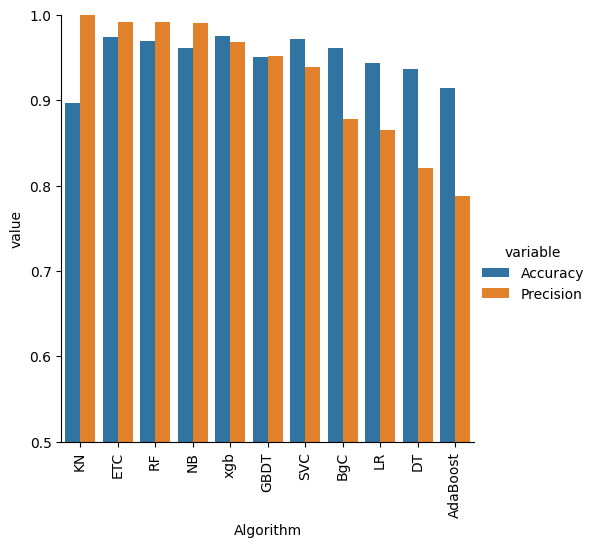

In [56]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

Since Naive Bayes performed extremely well thus exporting the same model for app.py to create a live app

In [63]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))